# Description
 The obejective of the insurance  dataset is to predict charges.The datasets consists of several predictor(independent)        variables and one target varible(charges).
 Dataset url:
# Name of the columns with their meanings
  1) Age: age of primary beneficiary
  2) Sex: insurance contractor gender female,male
  3) Bmi: Body mass index,providing an understanding of the body, weights that are relatively high or low relative to             height,objective index of the body weight(kg/ m^2)using the ratio of height to weight,idealy 18.5 to 24.9
  4) Children: Number of children covered by health insurance / Number of dependents
  5) Smoker: Smoking
  6) Region: The beneficary's residential in the US, northeast,southeast,southwest,northwest.
  7) Charges: Individual medical costs billed by health insurance
# Step 1: Importing libraries like Numpy,Pandas,Matplotlib,Seaborn and Sciket learn(sklearn)

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 2:Load the Dataset

In [360]:
df=pd.read_csv("/content/insurance.csv")

In [361]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [362]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


# Step 3: Exploratory Data Analysis
Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.
In this step,we will perform the below operations:
# 3.1) Understanding the variables
      3.1.1) Head of the dataset
      3.1.2) The shape of the dataset
      3.1.3) List types of all columns
      3.1.4) Info of the dataset
      3.1.5) Summary of the dataset
# 3.2) Data cleaning
      3.2.1) Check the duplicates
      3.2.2) Check the null values


      

# univariate data analysis

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

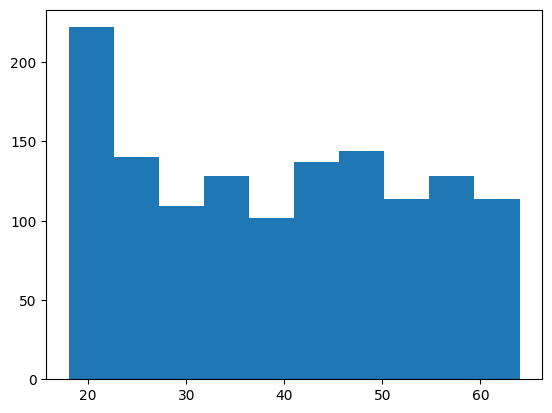

In [363]:
plt.hist(df['age'],bins=10)

<Axes: ylabel='bmi'>

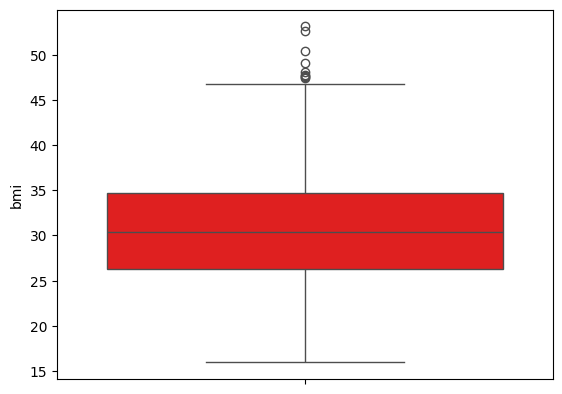

In [364]:
sns.boxplot(df['bmi'],color='red')

<Axes: ylabel='charges'>

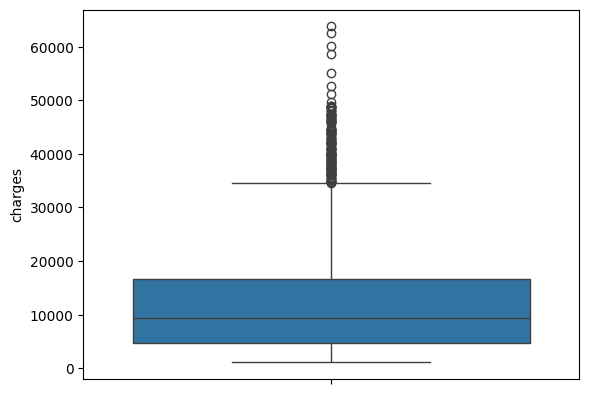

In [365]:
# box plot is used on numerical data
sns.boxplot(df['charges'])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

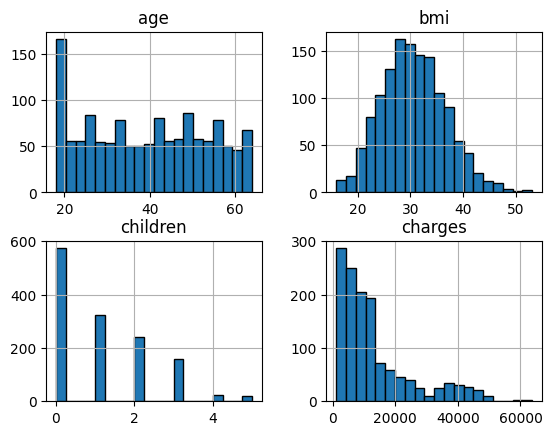

In [366]:
# hist is used on numerical data
df.hist(bins=20,edgecolor='black')

<Axes: ylabel='count'>

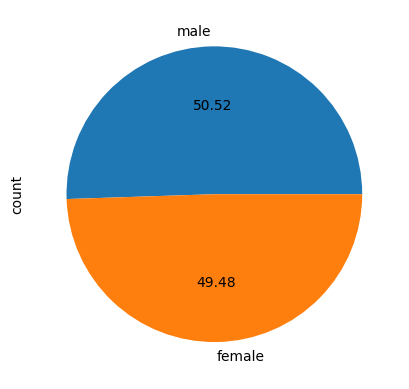

In [367]:
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')

# bivariate data analysis

# 1. scatterplot(Numerical-Numerical)

In [368]:
crosstab=pd.crosstab(df['sex'],df['region'])
crosstab

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [369]:
total_row = crosstab.sum(axis=0)
crosstab.loc['Total']=total_row
print(crosstab)

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163
Total         324        325        364        325


<Axes: xlabel='age', ylabel='charges'>

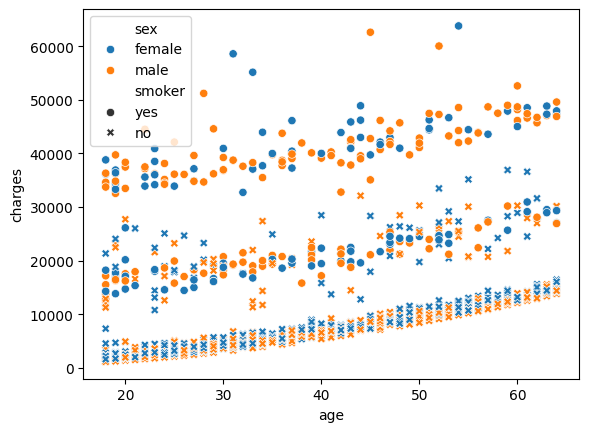

In [370]:

sns.scatterplot(x=df['age'],y=df['charges'],hue=df['sex'],style=df['smoker'])


<Axes: xlabel='age', ylabel='children'>

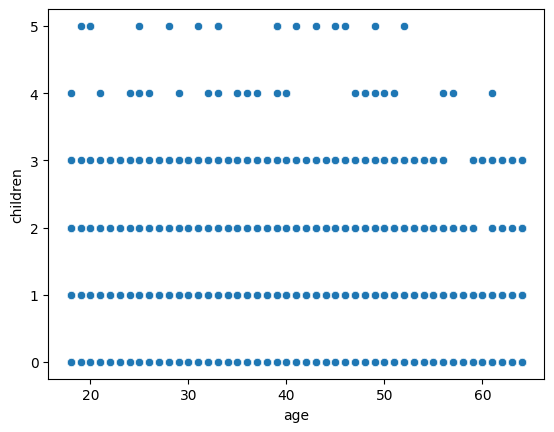

In [371]:
sns.scatterplot(x=df['age'],y=df['children'])

# Bar Plot(Numerical-Categorical)

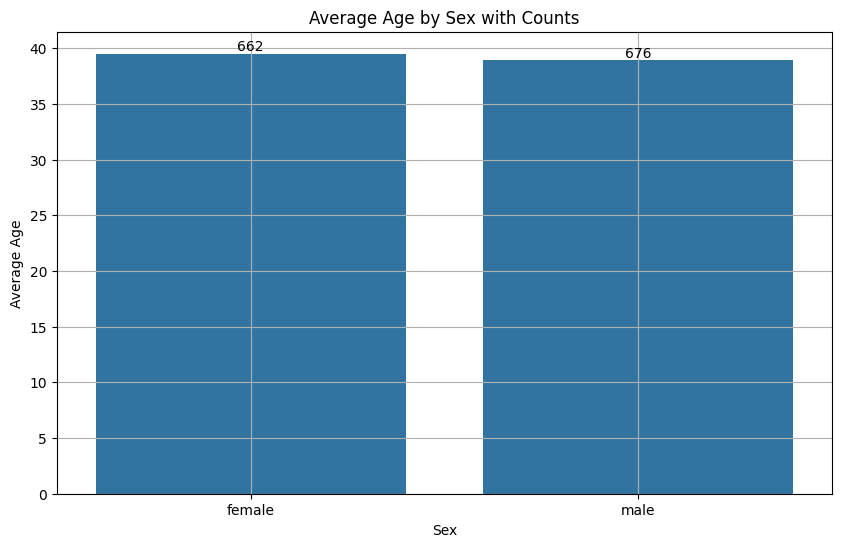

In [372]:

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='sex', y='age', data=df, ci=None)

# Calculate counts for annotation
counts = df['sex'].value_counts()

# Add counts on the bars
for p in bar_plot.patches:
    height = p.get_height()
    # Get the x-tick label instead of calculated position
    sex_value = p.get_x() + p.get_width() / 2
    sex_value = int(sex_value) # convert to integer
    sex_label = bar_plot.get_xticklabels()[sex_value].get_text()
    count = counts[sex_label]  # Use the sex_label as the key
    bar_plot.annotate(f'{count}', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Age by Sex with Counts')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.grid()
plt.show()

<Axes: xlabel='region', ylabel='charges'>

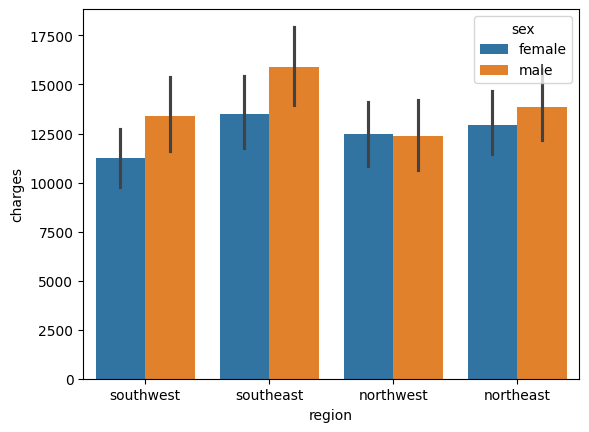

In [373]:
sns.barplot(x=df['region'],y=df['charges'],hue=df['sex'])

<Axes: xlabel='sex', ylabel='age'>

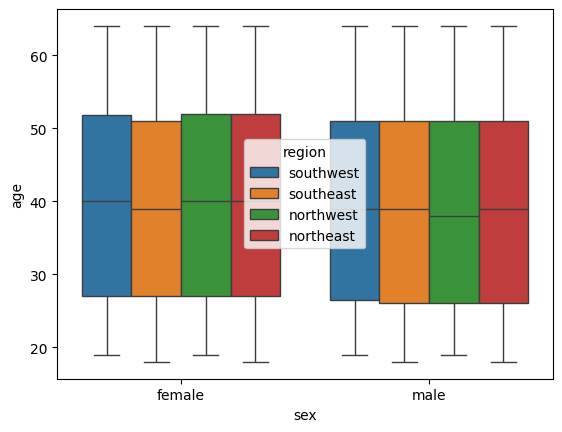

In [374]:
sns.boxplot(x=df['sex'],y=df['age'],hue=df['region'])

# HeatMap (Categorical-categorical)

<Axes: xlabel='region', ylabel='sex'>

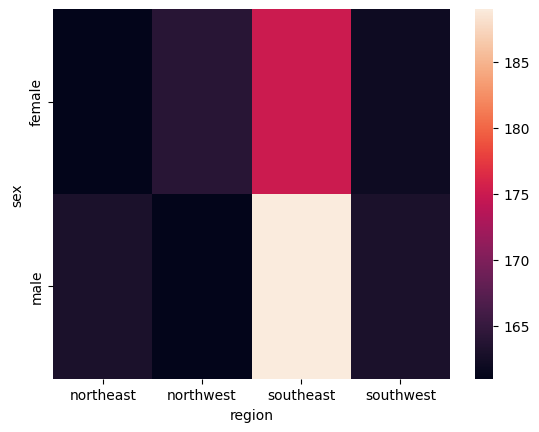

In [375]:
sns.heatmap(pd.crosstab(df['sex'],df['region']))

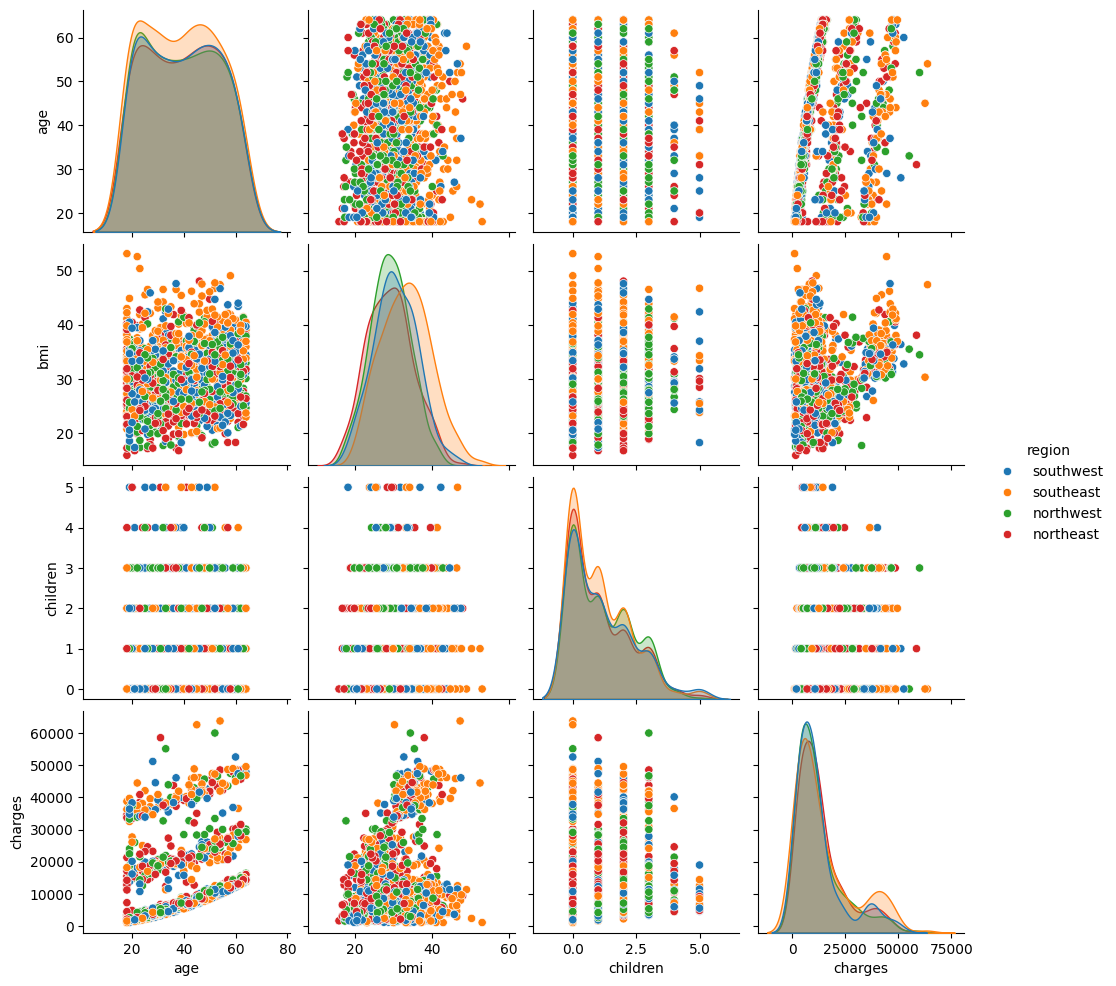

In [376]:
# Pair plot is used to plot scatter diagram b/w each numerical data
sns.pairplot(df,hue='region')

#   3.1.1) Head of the dataset
      The head(n)function returns the first n rows for the object based on the position.It is useful for quickely testing        if your object has the right type of data in it.

In [377]:
# display first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [378]:
#  display last five rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [379]:
# Display randomly any number of records of data
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
634,51,male,39.700,1,no,southwest,9391.34600
574,57,female,34.295,2,no,northeast,13224.05705
452,24,male,23.400,0,no,southwest,1969.61400
250,18,male,17.290,2,yes,northeast,12829.45510


# 3.1.2) Applying IQR to detect outliers


In [380]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]


In [381]:
# Calculate the mean of 'bmi' excluding outliers
bmi_mean = df.loc[~((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)), 'bmi'].mean()

# Replace outliers with the calculated mean
df.loc[((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)), 'bmi'] = bmi_mean

In [382]:
df.shape

(1338, 7)

 No. of rows=1338

 NO. of columns=7
# 3.1.3) List types of all columns
using df.dtypes, we get the list of types of all the columns in our dataset.

In [383]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


# 3.1.4) Info the dataset

info() is used to check the information about the data and the datatypes  of each respective attribute.

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3.1.5) summary of the dataset
 The described method will help to see how data has been spread for numerical values. We can clearly see the minimum values,mean,different percentile values and maximum values

In [385]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.537348,1.094918,13270.422265
std,14.049960,5.899988,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16639.912515
max,64.000000,46.750000,5.000000,63770.428010


# Numerical features

In [386]:
[ features for features in df.dtypes[df.dtypes !='object'].index]


['age', 'bmi', 'children', 'charges']

In [387]:
new_features=df.dtypes[df.dtypes !='object'].index

In [388]:
new_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

# Distribution of categorical features

In [389]:
cat_features= df.dtypes[df.dtypes=='object'].index
cat_features


Index(['sex', 'smoker', 'region'], dtype='object')

In [390]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Check the unique lables in the categorical variables

In [391]:
# check the unique lable of the 'sex' variable
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [392]:
# check the no. of lables of the 'sex' variable
print(df.sex.value_counts())

sex
male      676
female    662
Name: count, dtype: int64


In [393]:
# print the no. of lables of 'region' variable
print(df.region.value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [394]:
# print the no. of lables of 'smoker' variable
print(df.smoker.value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


# 3.2) Data cleaning

# 3.2.1) Drop the Duplicates
check there exist any duplicates value or not, If exists then we should remove from the dataframe.

In [395]:
# check the shape before drop the duplicates
df.shape

(1338, 7)

In [396]:
df=df.drop_duplicates()

In [397]:
# check the shape after drop the dupicates
df.shape

(1337, 7)

Here before droping no. of rows =1338

and after droping the duplicates,no. of rows=1337

which means only one Duplicates exist now which is removed.

finally, our dataset shape is=(1337,7)

# Check the NUll values
Using isnull.sum()function we can see the null values present in the column in the dataset.

In [398]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [399]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There is no Null values in the given datasets

# Feature Engineering

## Converting columns from string['sex','smoker','region'] To Numerical Values

# One Hot Encoding

In [400]:
df_dummies = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True).astype(int)

In [401]:
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


In [402]:
df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [403]:
df1=df_dummies

In [404]:
df1.shape

(1337, 9)

In [405]:
!pip install scipy
import numpy as np
import pandas as pd
from scipy import stats

# Apply Box-Cox transformation to 'charges'
df1['charges_boxcox'], lambda_ = stats.boxcox(df1['charges'])

# Print the optimal lambda value
print(f"Optimal lambda value: {lambda_}")

# Now, df1 will have a new column 'charges_boxcox' with the transformed values.


Optimal lambda value: 0.043583808507007535


In [406]:

df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges_boxcox
0,19,27,0,16884,0,1,0,0,1,12.124773
1,18,33,1,1725,1,0,0,1,0,8.805896
2,28,33,3,4449,1,0,0,1,0,10.144421
3,33,22,0,21984,1,0,1,0,0,12.530533
4,32,28,0,3866,1,0,1,0,0,9.942480


# 5) Applying box- cox transformation

In [407]:
df1=df1.drop('charges',axis=1)
target_name='charges_boxcox'
# Separate object for target feature
y=df1[target_name]

# Separate object for input feature
X=df1.drop(target_name, axis=1)

In [408]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


In [409]:
X.shape

(1337, 8)

In [410]:
y.shape

(1337,)

# 6) TRAIN TEST SPLIT

In [411]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)


In [412]:
X_train.shape,y_train.shape

((1069, 8), (1069,))

In [413]:
X_test.shape,y_test.shape

((268, 8), (268,))

# 7)Build the Regression Algorithms

In [414]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
y_test_pred.shape

(268,)

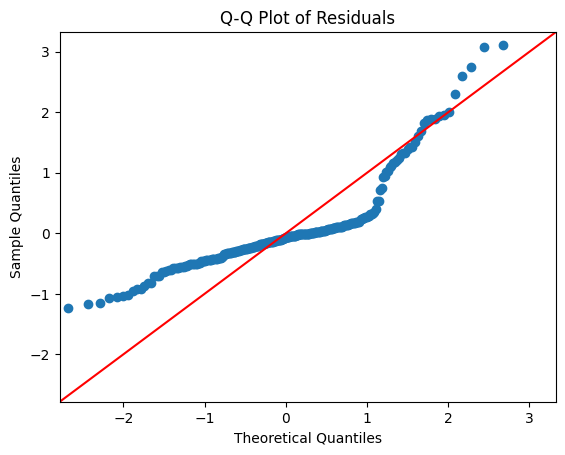

In [415]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = y_test - y_test_pred
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Evaluation Matrics

In [416]:
# train score
train_score=lr.score(X_train,y_train)
print('Train_score:', train_score)

Train_score: 0.7746396465079485


In [417]:
# R_2 Score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_test_pred)
print('r_2 score',score)

r_2 score 0.7546760067116149


In [418]:
X_test.shape[1]

8

In [419]:
# Calculate R² score
# Number of observations and features
n = len(y_test)
k = X_test.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)
adjusted_r2

0.7470984316293482

In [420]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_test_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean Absolute Error: 0.429826122838176
Mean Squared Error: 0.4774887189629013
Root Mean Squared Error: 0.6910055853340848


In [421]:
df2=pd.DataFrame({"Actual":y_test,"predicted":y_test_pred,"difference":y_test-y_test_pred})
df2

,Actual,predicted,difference
13,11.488183,11.519140,-0.030957
1052,11.223104,11.261897,-0.038793
172,8.780812,9.245527,-0.464716
395,10.911279,10.594111,0.317168
934,10.215338,10.477005,-0.261667
...,...,...,...
1028,11.310700,11.195215,0.115485
97,11.366675,11.344174,0.022502
220,10.316707,10.498160,-0.181454
41,10.298374,10.506331,-0.207956


In [422]:
df1.head(14)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges_boxcox
0,19,27,0,0,1,0,0,1,12.124773
1,18,33,1,1,0,0,1,0,8.805896
2,28,33,3,1,0,0,1,0,10.144421
3,33,22,0,1,0,1,0,0,12.530533
4,32,28,0,1,0,1,0,0,9.942480
5,31,25,0,0,0,0,1,0,9.901131
6,46,33,1,0,0,0,1,0,11.045283
7,37,27,3,0,0,1,0,0,10.862480
8,37,29,2,1,0,0,0,0,10.674358
9,60,25,0,0,0,1,0,0,12.957216


In [423]:
# predicting value of y corressponding to row 14 or index no. 13
lr.predict([[56,39,0,0,0,0,1,0]])

array([11.51914016])

In [424]:
print("intercept",lr.intercept_)

intercept 8.10600667422871


In [425]:
print("coefficents",lr.coef_)

coefficents [ 0.04978789  0.0230323   0.15049249 -0.1021462   2.36186327 -0.1376065
 -0.27324842 -0.21119313]


#Random forest

In [426]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)  # This was missing in the original code

# Calculate R² score
score = r2_score(y_test, y_pred)
print('r_2 score', score)

# Calculate Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)

print('Adjusted R-squared:', adjusted_r2)

r_2 score 0.7981399250203262
Adjusted R-squared: 0.7919048647892938


# Applying Gradientboosting

In [427]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create and train the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred)
print('R-squared:', score)

# Calculate Adjusted R²
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)
print('Adjusted R-squared:', adjusted_r2)

R-squared: 0.8120880557472299
Adjusted R-squared: 0.8062838258089203


# Applying Xgboost

In [428]:

import xgboost as xgb
from sklearn.metrics import r2_score

# Create and train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Evaluate the model
score = r2_score(y_test, preds)
print('R-squared:', score)

# Calculate Adjusted R²
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)
print('Adjusted R-squared:', adjusted_r2)

R-squared: 0.767421016969331
Adjusted R-squared: 0.7602371101575729


# Feature selection
Few advantages of Feature Selection:
1) Faster training times
2) Reduce the complexity
3) Improved the accuracy and performance
4) The most important one- reduction in 'over fitting'

There are many different kinds of feature selection methods
1) Forward Selection,
2) Recursive feature Elimination
3) Backward elimination

The simplest and widely used one is Backward elimination


 # Building optimal model using "Backward Elimination" Method

When we're building a machine learning model,it is very important that we select only those features or predictors  which are necessary.
Assume we have 100 feartures or predictor in our dataset. That doesn't necessrily mean that we need to have all 100 features in our model.

There are various ways in which we can find out which features have very little impact on the model and which ones we can remove from the dataset.

A similar idea can be applied in Backward Elimination wheather a feature significantly impacts the output or not.

A P-value helps determine weather a hypothesis must be accepted or rejected.

# Backward Elimination Method Procedure

* ## step 1

The first step in backward elimination is select a significance level, or select the P-value.

Usually, in most cases, a 5% significance level is selected.This means the P-value will be 0.05. You can change this value depending on the project.

* ## step 2

The second step is fit your machine learning model with all the features selected.

So,if there are 100 features,you include all of them in your model and fit the model on your dataset.No changes here.

* ## step 3

In step 3,identify the feature or predictor which has the highest P- value.

* ## step 4

This is a significance step. Here we take decisions.In the previous step 3,we identified the feature which has the highest
P-value. IF the P-value of this feature is greater than the significance level, we'll just jump to step 6,which means that
we're done

* ## step 5

Once we find out the feature which has to removed from the dataset and we'll fit the model again with new dataset.After fitting the model for the new dataset,we'll jump back to step 3.

This process continues untill we reach a point in step 4 where the highest P-value from all the remaining features in the dataset in less than the significance selected in step 1.

In our example, this means we iterate from step 3 to step 5 and back till the highest P-value in the dataset is less than 0.05.

Out of the 100 assumed features,we might filter out a good 10 features.

* ## step 6
 once we reach step 6, we are done with the feature selection process. We have successfully used backward elimination to filter out feature


In [429]:
import statsmodels.api as sm

In [430]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,1,0,0
1334,18,31,0,0,0,0,0,0
1335,18,36,0,0,0,0,1,0
1336,21,25,0,0,0,0,0,1


In [431]:
# add a columns of ones as integer data type
X1=np.append(arr=np.ones((1337,1)).astype(int),values=X,axis=1)

In [432]:
X1.shape

(1337, 9)

In [433]:
X1[:,0]

array([1, 1, 1, ..., 1, 1, 1])

In [434]:
# choose a significance level usually 0.05, if p> 0.05
# for the highest values parameter, remove that value
X_opt=X1[:,[0,1,2,3,4,5,6,7,8]]
X_opt.shape

(1337, 9)

In [435]:
X_opt

array([[ 1, 19, 27, ...,  0,  0,  1],
       [ 1, 18, 33, ...,  0,  1,  0],
       [ 1, 28, 33, ...,  0,  1,  0],
       ...,
       [ 1, 18, 36, ...,  0,  1,  0],
       [ 1, 21, 25, ...,  0,  0,  1],
       [ 1, 61, 29, ...,  1,  0,  0]])

# OLS stands for "Ordinary Least Squares',which essentially trains a linear model.

In [436]:
ols=sm.OLS(endog=y,exog=X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         charges_boxcox   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     558.3
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:17:54   Log-Likelihood:                -1327.6
No. Observations:                1337   AIC:                             2673.
Df Residuals:                    1328   BIC:                             2720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1153      0.107     75.668      0.000       7.905       8.326
x1             0.0504      0.001     39.126      0.000       0.048       0.053
x2             0.0215      0.003      6.786      0.000       0.015       0.028
x3             0.1452      0.015      9.742      0.000       0.116       0.174
x4            -0.1040      0.036     -2.889      0.004      -0.175      -0.033
x5             2.3432      0.045     52.450      0.000       2.256       2.431
x6            -0.0910      0.052     -1.766      0.078      -0.192       0.010
x7            -0.2254      0.052     -4.366      0.000      -0.327      -0.124
x8            -0.1899      0.052     -3.673      0.000      -0.291      -0.088
==============================================================================
Omnibus:                      480.600   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1756.431
Skew:                           1.742   Prob(JB):                         0.00
Kurtosis:                       7.403   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation

From the summary, we observe that the highest P-value is for 4th feature (x4=sex) is 0.695, which is way over our significance level of 0.05. Hence, we remove 'sex' feature.

# Now Remove the variable x4

In [437]:
# Remove 2th column (x4='sex') from the X1  as its highest P- value is 0.698
# Build the ols with remaining features and check the most significance value

X_opt1=X1[:,[0,1,2,3,5,6,7,8]]
X_opt1.shape

(1337, 8)

In [438]:
ols=sm.OLS(endog=y,exog=X_opt1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         charges_boxcox   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     633.3
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:17:54   Log-Likelihood:                -1331.8
No. Observations:                1337   AIC:                             2680.
Df Residuals:                    1329   BIC:                             2721.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0730      0.107     75.775      0.000       7.864       8.282
x1             0.0505      0.001     39.096      0.000       0.048       0.053
x2             0.0212      0.003      6.656      0.000       0.015       0.027
x3             0.1444      0.015      9.665      0.000       0.115       0.174
x4             2.3334      0.045     52.237      0.000       2.246       2.421
x5            -0.0902      0.052     -1.746      0.081      -0.192       0.011
x6            -0.2251      0.052     -4.350      0.000      -0.327      -0.124
x7            -0.1894      0.052     -3.654      0.000      -0.291      -0.088
==============================================================================
Omnibus:                      471.921   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1699.811
Skew:                           1.713   Prob(JB):                         0.00
Kurtosis:                       7.332   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation

From the summary, we observe that the highest P-value for 6th feature of X1 or X5 of x_opt1(x5=northwest) is 0.473, which is way over our significance level of 0.05. Hence, we remove 'northwest' feature.

In [439]:
# Remove the 6th feature from X1 as it has p_value > 0.05
# Build the ols model with remaining features and check the most significane value

X_opt2=X1[:,[0,1,2,3,5,7,8]]
X_opt2.shape

(1337, 7)

In [440]:
ols=sm.OLS(endog=y,exog=X_opt2).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         charges_boxcox   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     737.2
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:17:54   Log-Likelihood:                -1333.3
No. Observations:                1337   AIC:                             2681.
Df Residuals:                    1330   BIC:                             2717.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0287      0.104     77.540      0.000       7.826       8.232
x1             0.0505      0.001     39.070      0.000       0.048       0.053
x2             0.0212      0.003      6.646      0.000       0.015       0.027
x3             0.1436      0.015      9.609      0.000       0.114       0.173
x4             2.3353      0.045     52.255      0.000       2.248       2.423
x5            -0.1801      0.045     -4.010      0.000      -0.268      -0.092
x6            -0.1442      0.045     -3.209      0.001      -0.232      -0.056
==============================================================================
Omnibus:                      469.721   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.565
Skew:                           1.708   Prob(JB):                         0.00
Kurtosis:                       7.299   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation
From the summary, we observe that the highest P-value is for 8th feature of X1 or X6 of x_opt2(x6=southwest) is 0.054, which is way over our significance level of 0.05. Hence, we remove 'southwest' feature.

In [441]:
# Remove the 8th(southwest) feature from X1 as it has p_value > 0.05
# Build the ols model with remaining features and check the most significane value

X_opt3=X1[:,[0,1,2,3,5,7]]
X_opt3.shape

(1337, 6)

In [442]:
ols=sm.OLS(endog=y,exog=X_opt3).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         charges_boxcox   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     876.5
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:17:54   Log-Likelihood:                -1338.5
No. Observations:                1337   AIC:                             2689.
Df Residuals:                    1331   BIC:                             2720.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0094      0.104     77.215      0.000       7.806       8.213
x1             0.0505      0.001     38.959      0.000       0.048       0.053
x2             0.0201      0.003      6.335      0.000       0.014       0.026
x3             0.1430      0.015      9.536      0.000       0.114       0.172
x4             2.3371      0.045     52.117      0.000       2.249       2.425
x5            -0.1286      0.042     -3.056      0.002      -0.211      -0.046
==============================================================================
Omnibus:                      469.891   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1690.006
Skew:                           1.706   Prob(JB):                         0.00
Kurtosis:                       7.324   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation
From the summary, we observe that the highest P-value is for 7th feature of X1 or X5 of x_opt3 (x5=southeast) is 0.132, which is way over our significance level of 0.05. Hence, we remove 'southwest' feature..

In [443]:
# Remove the 7th(southwest) feature from X1 as it has p_value > 0.05
# Build the ols model with remaining features and check the most significane value
X_opt4=X1[:,[0,1,2,3,5]]
X_opt4.shape

(1337, 5)

In [444]:
ols=sm.OLS(endog=y,exog=X_opt4).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         charges_boxcox   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:17:54   Log-Likelihood:                -1343.1
No. Observations:                1337   AIC:                             2696.
Df Residuals:                    1332   BIC:                             2722.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0444      0.103     77.789      0.000       7.842       8.247
x1             0.0507      0.001     38.992      0.000       0.048       0.053
x2             0.0176      0.003      5.721      0.000       0.012       0.024
x3             0.1443      0.015      9.593      0.000       0.115       0.174
x4             2.3274      0.045     51.870      0.000       2.239       2.415
==============================================================================
Omnibus:                      461.370   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1640.866
Skew:                           1.676   Prob(JB):                         0.00
Kurtosis:                       7.268   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
# After applying feature selection we have only 5 important feature to predict charges -['constant','age','bmi',child,'smoker']
X_opt4

array([[ 1, 19, 27,  0,  1],
       [ 1, 18, 33,  1,  0],
       [ 1, 28, 33,  3,  0],
       ...,
       [ 1, 18, 36,  0,  0],
       [ 1, 21, 25,  0,  0],
       [ 1, 61, 29,  0,  1]])

In [446]:
X.columns


Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

# TRAIN TEST SPLIT After Feature Selection

In [447]:
X_train,X_test,y_train,y_test=train_test_split(X_opt4,y,test_size=0.2,random_state=0)
new_model=LinearRegression()
new_model.fit(X_train,y_train)
X_train.shape,X_test.shape

((1069, 5), (268, 5))

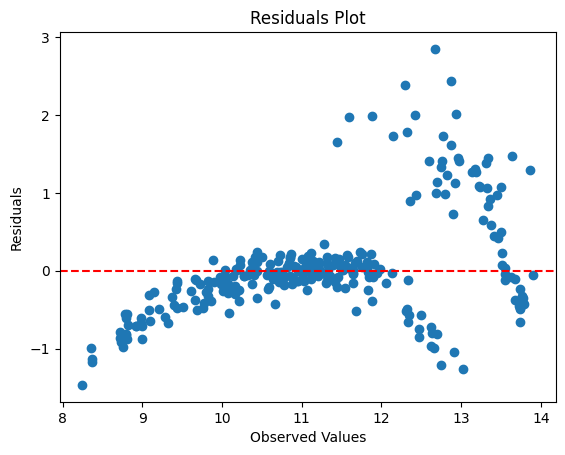

In [470]:
import matplotlib.pyplot as plt

# Residuals plot
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

#Applying GradientBoost

In [448]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create and train the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred)
print('R-squared:', score)

# Calculate Adjusted R²
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)
print('Adjusted R-squared:', adjusted_r2)

R-squared: 0.8465241173559251
Adjusted R-squared: 0.8435951882978321


# Applying xgboost

In [449]:

import xgboost as xgb
from sklearn.metrics import r2_score

# Create and train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

# Make predictions on the test set
preds = xg_reg.predict(X_test)

# Evaluate the model
score = r2_score(y_test, preds)
print('R-squared:', score)

# Calculate Adjusted R²
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)
print('Adjusted R-squared:', adjusted_r2)

R-squared: 0.7222081232842568
Adjusted R-squared: 0.7169067515912082


In [452]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(X_train, y_train)
print("Huber Regression R²:", huber.score(X_test, y_test))


Huber Regression R²: 0.7517596597904502


Prediction using linear regression

In [453]:
X_test

array([[ 1, 18, 39,  0,  0],
       [ 1, 47, 29,  1,  0],
       [ 1, 49, 31,  1,  0],
       ...,
       [ 1, 18, 26,  2,  0],
       [ 1, 54, 25,  3,  1],
       [ 1, 62, 30,  2,  0]])

In [454]:
new_train_pred=new_model.predict(X_train)
new_test_pred=new_model.predict(X_test)
new_test_pred.shape

(268,)

In [455]:
# train score after applying Backward Elimination method
train_score=new_model.score(X_train,y_train)
print('Train score:', train_score)

Train score: 0.765136178231628


In [456]:
# R_2 score after applying Backward Elimination method
score=r2_score(y_test,new_test_pred)
print("r2_score",score)

r2_score 0.7657115537389864


In [457]:
X_test.shape[1]

5

In [458]:
# Calculate R² score
# Number of observations and features
n = len(y_test)
k = X_test.shape[1]

# Calculate Adjusted R²
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - k - 1)
adjusted_r2


0.7612404001843869

Prediction using linear regression

In [459]:
X_test[2].reshape(1,-1)
from scipy.special import inv_boxcox

original_charge = inv_boxcox(y_test.iloc[2], lambda_)
print(original_charge)

9290.000000000015


In [460]:
lr_predictions_transformed = new_model.predict(X_test[2].reshape(1, -1))
lr_predictions_original = inv_boxcox(lr_predictions_transformed, lambda_)
lr_predictions_original

array([9158.67466978])

# Observation
Before Backward Elimination(with 8 feature): adjusted r_2 score 0.74

After applying Backward Elimination(with 5 feature):adjusted r2_score 0.76 with linear regression



In [461]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,new_test_pred))
print("Mean Squared  Error:",metrics.mean_squared_error(y_test,new_test_pred))
print("Root Mean squared Error:",np.sqrt(metrics.mean_absolute_error(y_test,new_test_pred)))

Mean Absolute Error: 0.4441557381166196
Mean Squared  Error: 0.46713441386122906
Root Mean squared Error: 0.6664501017455242


In [462]:
residuals=pd.DataFrame({'Actual':y_test,'predicted':new_test_pred,'diffrence':y_test-new_test_pred})
residuals.head()

,Actual,predicted,diffrence
1248,8.730143,9.644061,-0.913917
610,11.099516,11.066871,0.032645
393,11.223424,11.202229,0.021195
503,13.142453,11.869610,1.272843
198,11.279160,10.930969,0.348192


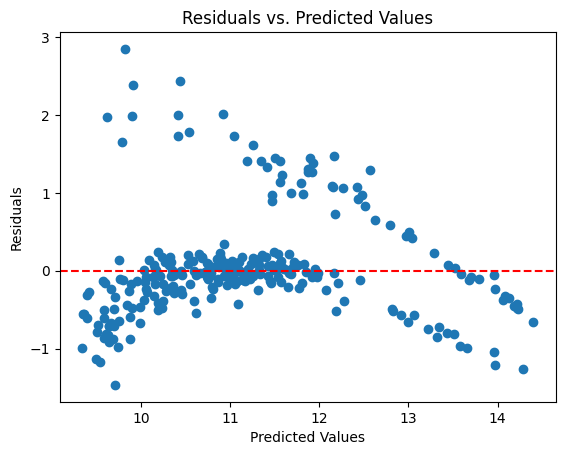

In [463]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the actual target values
# and 'new_test_pred' contains the predicted values

# Calculate residuals
residuals = y_test - new_test_pred

# Create a scatter plot of residuals against predicted values
plt.scatter(new_test_pred, residuals)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Set plot title and labels
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Display the plot
plt.show()

In [464]:
# Make predictions on the test set

prediction= new_model.predict(X_test[2].reshape(1, -1))
prediction= inv_boxcox(prediction, lambda_)
print(prediction)

[9158.67466978]


In [465]:
print('Intercept',new_model.intercept_)

Intercept 8.057747701163208


In [466]:
print('coefficients',new_model.coef_)

coefficients [0.         0.05015134 0.01752792 0.14370062 2.33314919]


In [467]:
X_test[267]

array([ 1, 62, 30,  2,  0])

In [468]:
# actual value of y corressponding to row value 267 mathematically
# y=m1*x1+m2*x2+m3*x3+m4*x4+m5*x5+b
y[267]= sum(new_model.coef_*X_test[267])+new_model.intercept_
print(y[267])

11.980369612679674


In [469]:
y[267]

11.980369612679674